# VeloCityX: Enhancing Fan Engagement and Monetization Through Data Science

## Overview

VelocityX is a revolutionary app offering fans an enhanced experience during autonomous racing events. The app provides **Live 360° coverage**, **fan challenges**, and allows them to buy **virtual merchandise**, making it a multi-dimensional experience for the race enthusiasts.

For this Data Science task, the objective is to analyze user interaction data in order to provide actionable insights towrads **fan engagement** and **monetization strategies** for this app. This includes:
- Identifying key user behaviors.
- Predicting which users are most likely to purchase merchandise.
- Proposing strategies for sponsorship integration.

## Objectives

The analysis will cover the following areas:
1. **Data Cleaning & Organization**: Preparing the dataset for analysis by cleaning and handling situations with any missing values.
2. **Clustering & Predictive Modeling**: Applying clustering techniques and predictive modeling to identify user groups and predict behaviors like merchandise purchases.
3. **Visualization**: Using data visualizations to highlight insights and trends.
4. **Propose Fan Challenges**: Based on the analysis, propose new fan challenges to increase engagement and monetization.

This notebook will walk through all steps from data preparation to model evaluation to provide an overview of user behavior and actionable insights for enhancing the VeloCityX platform.

## 1. Data Loading and Preview
In this section, I have loaded the dataset containing the user interaction data in the VeloCityX app. There are various key features in the data that represent user behaviors such as:
- **User ID**: A unique identifier for each user.
- **Fan Challenges Completed**: The number of fan challenges a user has completed.
- **Predictive Accuracy (%)**: The accuracy percentage of a user's predictions in the challenges.
- **Virtual Merchandise Purchases**: The number of virtual merchandise purchases made by the user.
- **Sponsorship Interactions (Ad Clicks)**: The number of ad clicks a user has made, representing sponsorship interactions.
- **Time on Live 360 (mins)**: The amount of time (in minutes) a user spent watching the live 360-degree coverage.
- **Real-Time Chat Activity (Messages Sent)**: The number of messages a user has sent during real-time chat activity.

### Result:
In the output table, we can see the first few rows of the dataset to get a quick overview of the user behaviors. An example could be, User U001 has completed 5 fan challenges with an 80% prediction accuracy, purchased 3 virtual merchandise items, and interacted with 10 ads while spending 120 minutes on live coverage.

![Output Table](./Header%20output.png)

In [1]:
import pandas as pd

# I first loaded the CSV file into a pandas DataFrame
file_path = '2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
data = pd.read_csv(file_path)

# With this, I can preview the first few files of the data to see if everything makes sense and what is going on and what data I am dealing with
data.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


## 2. Data Quality Check and Basic Statistics

The purpose of this section is to ensure that the dataset is clean and ready for analysis. This is done by checking for missing values, reviewing the data types of each column, and generating basic statistics to understand the distribution.

### Steps:

- **Checking for Missing Values**: 
  - I identify any missing values in each column using `.isnull().sum()`
  - **Result**: There are no missing values in any of the columns, meaning the dataset is complete and does not require any imputation for missing data.

- **Checking Data Types**:
  - To verify the data types of each column, I use `.dtypes`
  - **Result**: Most of the columns are integers (`int64`), except for the `User ID`, which is an object type. With this, I can confirm that the columns with "Fan Challenges Completed" or "Predicitve Accuracy (%)" are in the correct numerical format for analysis.

- **Basic Statistics**:
  - To generate general statistical information about the numerical columns, such as count, mean, standard deviation, or min and max values, I use the `.describe()` function.
  - **Result**:
    - The result shows that the **mean number of fan challenges completed** is approximately **5.79**, while the **mean predictive accuracy** across users is **74.99%**.
    - The **maximum amount of time spent on Live 360** is **199 minutes**, and the **maximum number of chat messages sent** is **49**.
  
  <img src="./Statistical_Report.png" alt="Statistical Report" style="width: 400px;"/>


### What can be inferred?
- The dataset is clean and well-structured, with no missing data.
- The basic statistics provide an overview of user behavior patterns.
- The spread in "Time on Live 360" (from 3 to 199 minutes) suggests that different users engage with the app for widely varying amounts of time.


In [2]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Checking the data types of each column
print("\nData types of the columns:\n", data.dtypes)

# Generating some basic statistics of the dataset
data_description = data.describe()
print("\nBasic statistics of the dataset:\n", data_description)


Missing values in each column:
 User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64

Data types of the columns:
 User ID                                    object
Fan Challenges Completed                    int64
Predictive Accuracy (%)                     int64
Virtual Merchandise Purchases               int64
Sponsorship Interactions (Ad Clicks)        int64
Time on Live 360 (mins)                     int64
Real-Time Chat Activity (Messages Sent)     int64
dtype: object

Basic statistics of the dataset:
        Fan Challenges Completed  Predictive Accuracy (%)  \
count                100.000000               100.000000   
mean                   5.790000                74.990000   
std                    2.825908 

## 3. Correlation Analysis and High Purchasers Insight

In this section, the goal is to explore the relationships between different user behaviour features using a **correlation matrix** and look into what users have made a higher number of **virtual merchandise purchases**.

### Steps:

- **Correlation Matrix**:
  - With the correlation matrix, we can see the linear relationships between different variables in the dataset.
  - **Visualization**: The heatmap below visualizes the correlation matrix, with values ranging from **-1** to **+1** showing a negative or a positive correlation.
  
  <img src="./Correlation_Matrix.png" alt="Correlation Matrix" style="width: 600px;"/>


### Key Insights from the Correlation Matrix:
- **Fan Challenges Completed vs. Virtual Merchandise Purchases**: There is a **weak positive correlation** (0.16) between the number of fan challenges completed and virtual merchandise purchases. This suggests that users who engage more with fan challenges are slightly more likely to purchase virtual merchandise.
- **Sponsorship Interactions vs. Real-Time Chat Activity**: A **moderate positive correlation** (0.19) can be seen between sponsorship interactions (ad clicks) and real-time chat activity, indicating that users who interact more with ads are also more active in live chat discussions.
- **Other Weak Correlations**: Most other correlations are weak, such as the relationship between **Predictive Accuracy** and **Virtual Merchandise Purchases** (0.022), suggesting that users’ predictive accuracy doesn't strongly influence their purchasing behavior.

- **High Purchasers Analysis**:
  - I have filtered users who made more than **5 merchandise purchases** to understand their behaviors better. The table below summarizes key statistics for these high-purchasing users.


<img src="./Output1.png" alt="Statistics for high purchasing users" style="width: 400px;"/>

### High Purchasers Summary:
- **Fan Challenges Completed**: High purchasers completed an average of **6.64 challenges**, which is higher than the overall dataset's average.
- **Predictive Accuracy**: Their average predictive accuracy is about **79.07%**, which is slightly higher than the overall dataset's mean (around 75%).
- **Sponsorship Interactions**: These users interacted with sponsorships by clicking on an average of **10.5 ads**.
- **Time on Live 360**: On average, high purchasers spent **120.57 minutes** watching Live 360 content, with some users spending up to **185 minutes**.
  
### What can be inferred?
- **Higher Engagement Leads to Higher Purchases**: Users who participate in more challenges and spend more time on Live 360 content tend to purchase more virtual merchandise.
- **Moderate Chat and Sponsorship Engagement**: High purchasers also tend to be moderately active in chat and sponsorship interactions, further suggesting that higher engagement correlates with monetization opportunities.


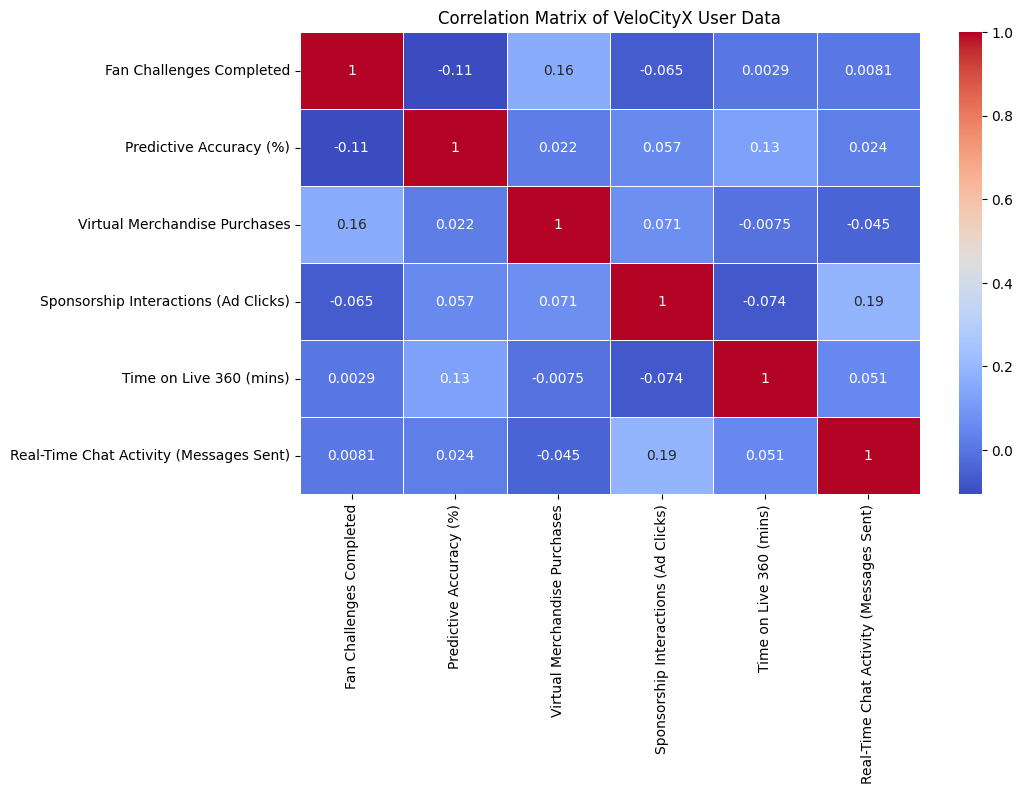

High Purchasers Data Stats:
        Fan Challenges Completed  Predictive Accuracy (%)  \
count                 14.000000                14.000000   
mean                   6.642857                79.071429   
std                    3.248837                10.745047   
min                    1.000000                55.000000   
25%                    4.000000                74.250000   
50%                    7.500000                83.000000   
75%                    9.000000                86.000000   
max                   10.000000                94.000000   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                           14.0                             14.000000   
mean                             6.0                             10.500000   
std                              0.0                              5.287867   
min                              6.0                              2.000000   
25%                              6.0    

In [6]:
# Making sure to exclude the User ID when calculating correlation as the User ID consisted of Object and not Integer Data types
correlation_matrix = data.drop('User ID', axis=1).corr()

# Using seaborn to visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of VeloCityX User Data')
plt.show()

# This step filters users with high virtual merchandise purchases as written above of a value more than 5
high_purchasers = data[data['Virtual Merchandise Purchases'] > 5]

print("High Purchasers Data Stats:\n", high_purchasers.describe())


## 4. Clustering: Elbow Method for Optimal Cluster Identification

Now the goal is to apply the **K-means clustering algorithm** to group users based on their behavior. The first step is to determine the optimal number of clusters using the **Elbow method**, to see the point where the data starts forming an elbow for the optimal number of clusters.

### Steps:

1. **Data Preparation**:
   - Once again, I exclude the non-numerical and non-relevant columns for clustering, such as `User ID` and `Virtual Merchandise Purchases`.
   - The remaining features, which include `Fan Challenges Completed`, `Predictive Accuracy (%)`, `Sponsorship Interactions (Ad Clicks)`, `Time on Live 360 (mins)`, and `Real-Time Chat Activity (Messages Sent)`, are standardized using `StandardScaler`. Since K-means is sensitive to feature scaling, this ensures that all features contribute equally to the clustering.

2. **Elbow Method**:
   - The Elbow Method helps us determine the optimal number of clusters by plotting the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters, by seeing the point where the number of clusters where it seems to bend like an elbow bends.
   - WCSS measures the variance within each cluster.

<img src="./Cluster_Elbow.png" alt="Elbow method" style="width: 600px;"/>

### What can be inferred?
- The elbow plot shows that the **optimal number of clusters** is likely around **4** clusters. This is where the WCSS begins to flatten, indicating that adding more clusters provides diminishing returns in reducing variance within the clusters.

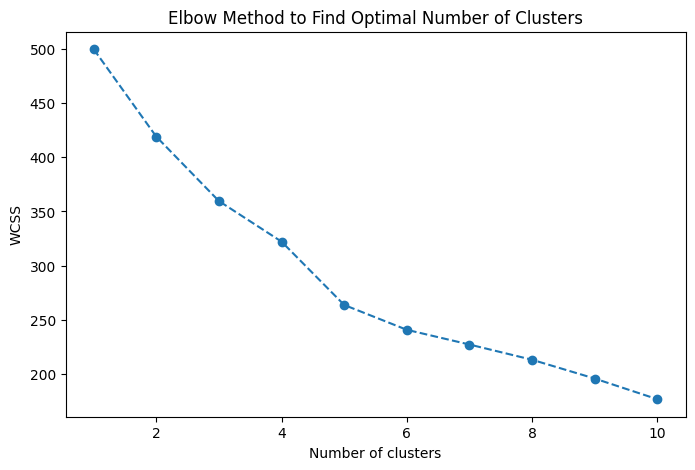

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
data = pd.read_csv(file_path)

clustering_data = data.drop(columns=['User ID', 'Virtual Merchandise Purchases'])

# This step standardizes the data for K-means clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# now I implement the ELBOW METHOD
# Using a list to store the WCSS values for different cluster sizes
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # The intertia here is the WCSS

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



## 5. K-means Clustering and Cluster Analysis

In this section, I have applied **K-means clustering** using the optimal number of clusters identified from the Elbow Method (4 clusters). This allows us to group users based on similar behaviors and analyze the characteristics of each cluster.

### Steps:

1. **Clustering Users**:
   - I use K-means with **4 clusters** to group users based on their behavior features, such as fan challenges completed, predictive accuracy, sponsorship interactions, time on Live 360, and real-time chat activity. The clustering algorithm assigns each user to a specific cluster based on the similarity of their behavioral patterns.

2. **Cluster Centers**:
   - The cluster centers represent the "average" behavior for users in each cluster. These centers help describe the typical characteristics of users in each group. The cluster center values are standardized (as I have applied `StandardScaler`), so they are in the same unitless scale.
   
   **Cluster Centers**:
   - Cluster 0: Users who have low engagement in challenges but higher ad interactions and chat activity.
   - Cluster 1: Users with high predictive accuracy and high time spent on Live 360 content.
   - Cluster 2: Users with moderate fan engagement and moderate ad interactions.
   - Cluster 3: Users with lower fan challenge engagement but moderate time on Live 360 and chat activity.

3. **Cluster Summary**:
   - I calculated the **mean values** of key features for each cluster to better understand the characteristics of each group. The summary table provides insights into how different clusters of users behave.
   
   **Cluster Insights**:
   - **Cluster 0**: Users in this group completed an average of 4.33 challenges, with a predictive accuracy of around 67.94%. They also had the highest number of ad clicks (14.83) and were very active in chat, sending an average of 39.72 messages.
   - **Cluster 1**: This group had the highest predictive accuracy (85.33%) and spent the most time on Live 360 (158.21 minutes). Their ad clicks and chat activity were moderate compared to other groups.
   - **Cluster 2**: These users had moderate engagement, completing around 6.21 challenges with an average predictive accuracy of 71.26%. They also had moderate levels of ad interactions and chat activity.
   - **Cluster 3**: This group had the lowest engagement in challenges and ad interactions but spent a considerable amount of time on Live 360 (154.05 minutes).

   <img src = "./Cluster_Data.png" alt = "Cluster Data" width = "600px">

4. **Cluster Visualization**:
   - The pairplot shows how users are distributed across clusters based on various features. It provides a visual representation of the differences in behavior between clusters.

   <img src = "./Pairplot.png" alt = "Pairplot for the clusters" width = "600px">


### What can be inferred?
- **Cluster 0** users are more engaged with ads and real-time chat but have lower predictive accuracy and participation in challenges.
- **Cluster 1** consists of highly engaged users with high predictive accuracy and significant time spent on Live 360 content.
- **Cluster 2** and **Cluster 3** are more moderate in terms of behavior, with varying levels of interaction with the app.

Cluster centers:
 [[-0.51806532 -0.50458166  0.97539831  0.4143467   1.04116591]
 [ 0.77117046  0.74075866  0.05072494  0.75072339  0.09402426]
 [ 0.14764087 -0.26738855  0.00601546 -0.96629018 -0.26374101]
 [-0.78636364  0.09117977 -1.00048269  0.64261657 -0.56377208]]
Cluster summary:
          Fan Challenges Completed  Predictive Accuracy (%)  \
Cluster                                                      
0                        4.333333                67.944444   
1                        7.958333                85.333333   
2                        6.205128                71.256410   
3                        3.578947                76.263158   

         Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
Cluster                                                                        
0                             2.222222                             14.833333   
1                             2.833333                              9.000000   
2                 

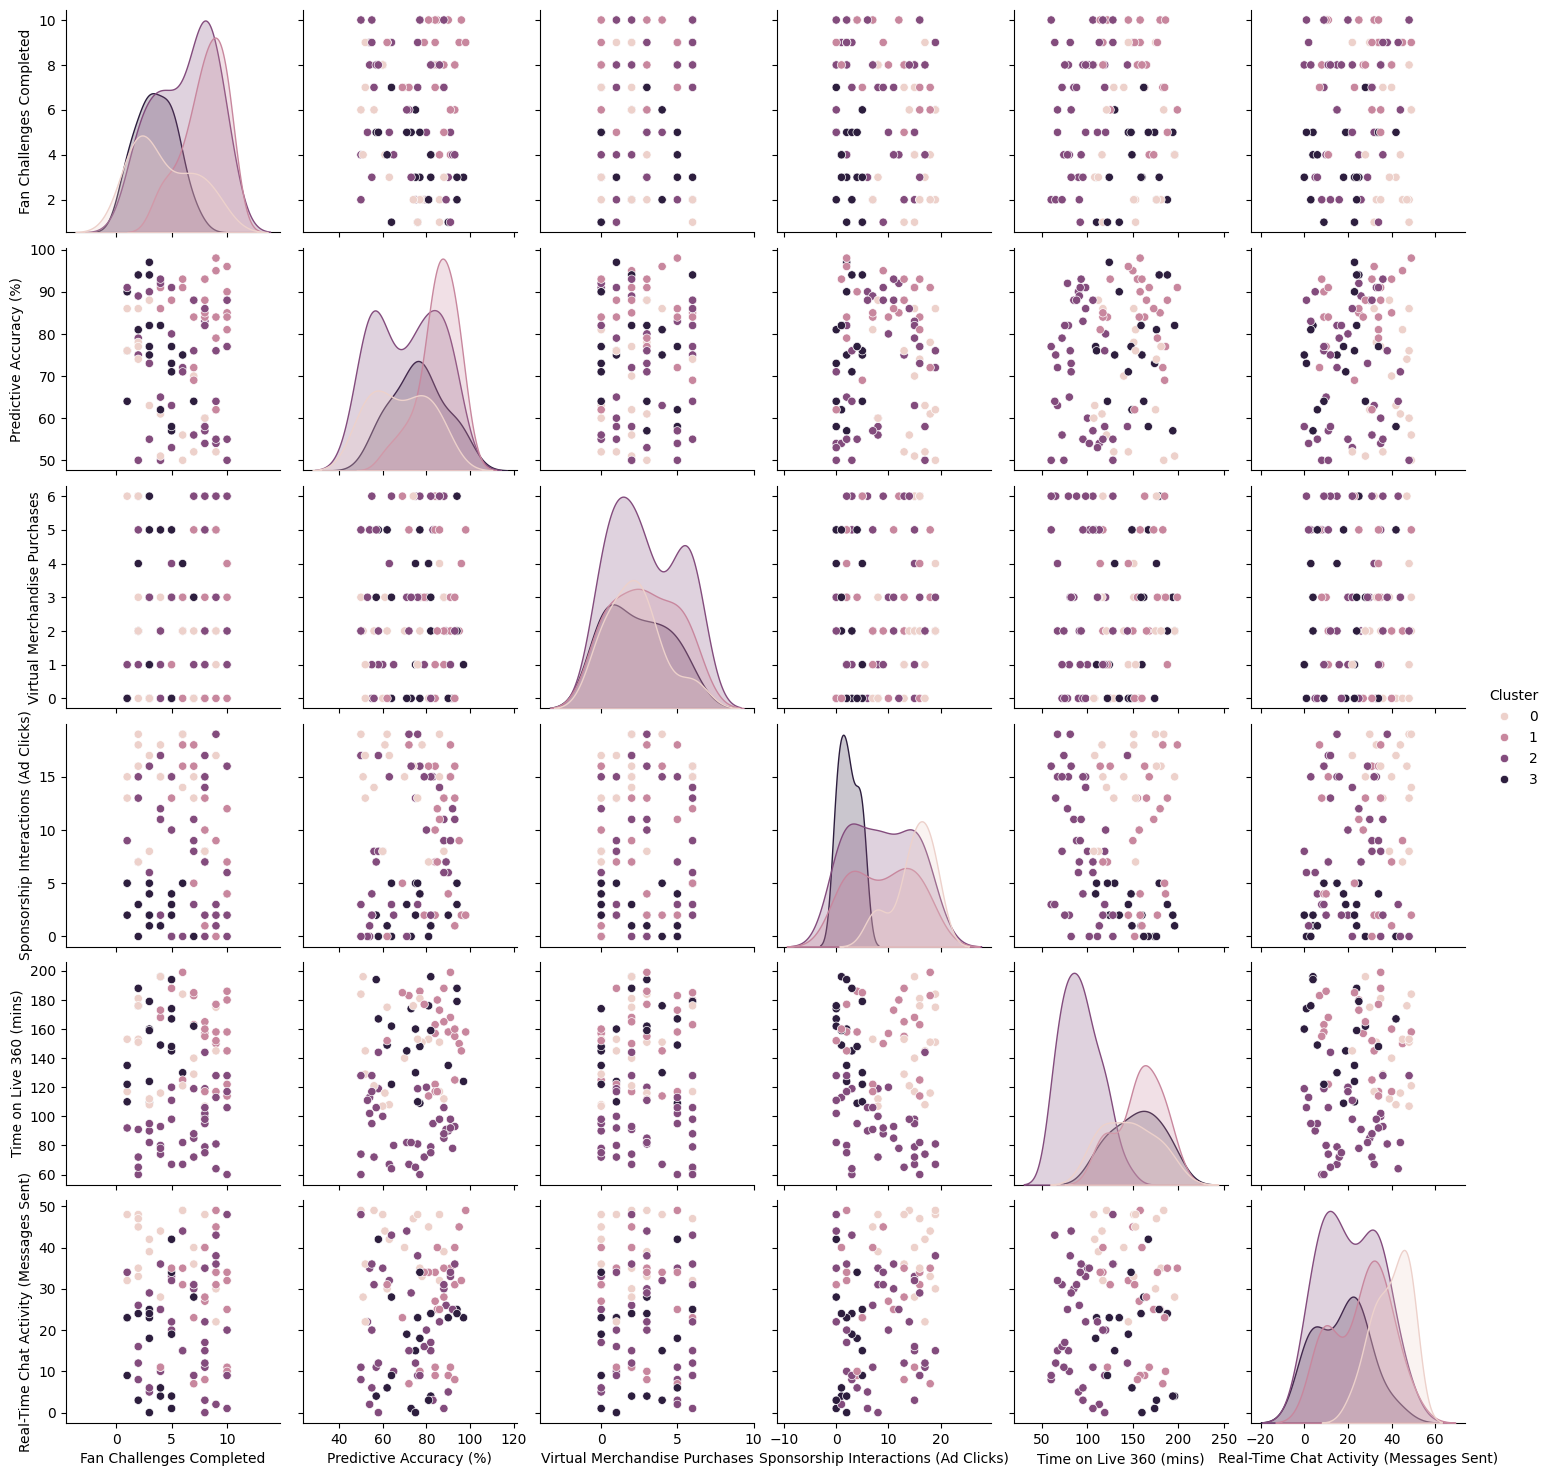

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# I get the cluster centers in this step
print("Cluster centers:\n", kmeans.cluster_centers_)

numeric_columns = data.drop(columns=['User ID', 'Cluster']).select_dtypes(include=['number'])

# Now I analyze the clusters by calculating the mean values for each column
cluster_summary = data.groupby('Cluster')[numeric_columns.columns].mean()
print("Cluster summary:\n", cluster_summary)

sns.pairplot(data, hue='Cluster')
plt.show()

## 6. Predictive Modeling: XGBoost with Hyperparameter Tuning

In this final section, I apply a **predictive model** using the **XGBoost algorithm** to predict whether a user will make a **virtual merchandise purchase** based on their behavior. I have also performed **hyperparameter tuning** using **GridSearchCV** to optimize the model.

### Steps:

1. **Feature Selection and Target Definition**:
   - I first define features (`X`) by dropping columns such as `User ID`, `Virtual Merchandise Purchases`, and `Cluster`, as they are not directly relevant to the prediction task.
   - The target (`y`) is a binary variable that tells us whether the user has made any virtual merchandise purchases (`1` if they have, `0` if not).

2. **Handling Class Imbalance with SMOTE**:
   - Since the dataset is sort of imbalanced (with more users who do not make purchases), I apply **SMOTE** (Synthetic Minority Over-sampling Technique) to oversample the minority class (non-purchasers). With this, I can balance the dataset and improve model performance on the minority class.

3. **Model Definition**:
   - I use **XGBoost**, which is an efficient gradient boosting algorithm.

4. **Hyperparameter Tuning**:
   - Using **GridSearchCV**, I tune important hyperparameters such as:
     - `n_estimators` (the number of trees in the model),
     - `max_depth` (the maximum depth of the trees),
     - `learning_rate` (the step size at each iteration),
     - `subsample` (the fraction of samples used for training).
   - **GridSearchCV** uses 5-fold cross-validation to find the optimal set of hyperparameters that yield the best performance.

5. **Model Evaluation**:
   - Once the best model is selected from the grid search, I evaluate its performance on the test set using a **classification report**, which provides metrics such as precision, recall, and f1-score.

### Results:

- **Best Hyperparameters**: 
  - The grid search found the optimal hyperparameters as:
    - `learning_rate`: **0.1**
    - `max_depth`: **7**
    - `n_estimators`: **300**
    - `subsample`: **1.0**

- **Classification Report for the Tuned XGBoost Model**:
  - **Class 0 (Non-Purchasers)**:
    - **Precision**: **0.23** — Out of the predicted non-purchasers, only 23% were correct.
    - **Recall**: **0.60** — The model correctly identified 60% of the actual non-purchasers.
  - **Class 1 (Purchasers)**:
    - **Precision**: **0.88** — Out of the predicted purchasers, 88% were correct.
    - **Recall**: **0.60** — The model correctly identified 60% of the actual purchasers.
  - **Overall Accuracy**: **60%** — The model correctly predicted 60% of all test instances.

### What can be inferred?
- **Moderate Performance**: The model performs well in identifying purchasers (high precision for Class 1). The overall recall is balanced between both classes, but precision for non-purchasers is lower.

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

X = data.drop(columns=['User ID', 'Virtual Merchandise Purchases', 'Cluster'])
y = data['Virtual Merchandise Purchases'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification

# I split 70% of the data into the training set and 30% into testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# In this step, I apply SMOTE to oversample the minority class that are the Non-Purchasers
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# This part defines the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [3, 5, 7],                 # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],      # Learning rate
    'subsample': [0.8, 1.0]                 # Subsample ratio
}

# Using GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# We have to now get the best estimator (XGBoost model with the best hyperparameters)
best_xgb_model = grid_search.best_estimator_

# Predict using the best model on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

print("Classification Report for Tuned XGBoost Model:")
print(classification_report(y_test, y_pred_xgb))


Best parameters found by GridSearchCV: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Classification Report for Tuned XGBoost Model:
              precision    recall  f1-score   support

           0       0.23      0.60      0.33         5
           1       0.88      0.60      0.71        25

    accuracy                           0.60        30
   macro avg       0.56      0.60      0.52        30
weighted avg       0.77      0.60      0.65        30



## 7. My Proposed New Fan Challenge: "Ultimate Predictor Challenge"

### Challenge Description:
The "Ultimate Predictor Challenge" is a fan challenge where users can make real-time predictions during race events. Users can predict various outcomes such as:
- **Which team will complete the most laps without requiring a recharge?**
- **Which vehicle will have the fastest pit stop?**
- **Which team will have the highest sponsorship interactions (ad clicks) by the end of the race?**

This challenge is designed to allow users to earn points for each correct prediction. The users who make the most accurate predictions during the event will win virtual merchandise or exclusive in-app rewards such as digital collectibles or special vehicle skins.

### Target Audience:
The challenge targets **highly engaged users** from **Cluster 1** and **Cluster 0**, who:
- Spend significant time on **Live 360** coverage.
- Participate actively in fan challenges with **high predictive accuracy** (Cluster 1 has the highest accuracy at 85.33%).
- Engage frequently with **sponsorship interactions** and **real-time chat** (Cluster 0 has the highest ad clicks and chat activity).

### Predicted Outcomes:

#### 1. **Increased Fan Engagement**:
- **Cluster 1** users, who already demonstrate high engagement and accuracy, are likely to find this challenge appealing. Their predictive accuracy can tell us that they enjoy making predictions and are invested in the race outcomes. 
- The interactive nature of the challenge will incentivize them to engage further in both **Live 360 coverage** and real-time chat, driving up the app's overall engagement levels during live events.

#### 2. **Boost in Virtual Merchandise Sales**:
- **Cluster 0** and **Cluster 1** users, who already make more **virtual merchandise purchases**, will be incentivized to win more exclusive in-app rewards. These rewards could be linked to virtual merchandise purchases, increasing the likelihood of continued purchases.
- By integrating merchandise rewards (e.g., unique skins or collectibles), users will be more inclined to compete in the challenge and, in turn, buy more items to stand out in the community.

#### 3. **Higher Sponsorship Interaction**:
- Since users in **Cluster 0** already have high **sponsorship interactions (ad clicks)** , this challenge can increase ad exposure by encouraging users to interact with sponsored content for extra points. This could lead to an increase in **click-through rates** for sponsored ads, driving **monetization** through higher sponsorship revenue.

### Monetization Strategy:
- The challenge can be monetized by offering **exclusive virtual merchandise** or in-app purchases that enhance the user experience. For example:
  - Users who want an **extra prediction slot** or **insider data** for more accurate predictions can purchase these as an add-on.
  - Additionally, branded in-app rewards (e.g., virtual team jerseys with sponsor logos) can be sold as merchandise, directly integrating the sponsorship opportunities into the challenge.
  
By taking advantage of the highly engaged user clusters and offering appealing incentives, this fan challenge can increase user interaction, drive merchandise sales, and boost sponsorship revenue.
